# ニューラルネットワーク
参考：『Pattern Recognition and Machine Learning』(ChristopherBishop)

https://www.microsoft.com/en-us/research/people/cmbishop/prml-book/

### フォワードパロパゲーション

1. 入力と重みの総和:
$$ z^{(l)} = W^{(l)} a^{(l-1)} + b^{(l)} $$
ここで、
- $ l $ は層の番号
- $ W^{(l)} $ は $ l $ 層の重み行列
- $ a^{(l-1)} $ は $ l-1 $ 層の活性化
- $ b^{(l)} $ は $ l $ 層のバイアスベクトル

2. 活性化関数を適用:
$$ a^{(l)} = f(z^{(l)}) $$
ここで、$ f $ は活性化関数 (例: Sigmoid, ReLUなど)

### バックプロパゲーション

1. 出力層の誤差:
$$ \delta^{(L)} = (a^{(L)} - y) \odot f'(z^{(L)}) $$
ここで、
- $ L $ は最後の層
- $ y $ は正解ラベル
- $ f' $ は活性化関数の導関数
- $ \odot $ は要素ごとの積

2. 隠れ層の誤差:
$$ \delta^{(l)} = (W^{(l+1)T} \delta^{(l+1)}) \odot f'(z^{(l)}) $$

3. 重みとバイアスの勾配:
$$ \frac{\partial J}{\partial W^{(l)}} = \delta^{(l)} a^{(l-1)T} $$
$$ \frac{\partial J}{\partial b^{(l)}} = \delta^{(l)} $$
ここで、$ J $ はコスト関数（例：二乗誤差，交差エントロピーなど）

## 実装例

In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import networkx as nx

# データのロード
iris = load_iris()
X = iris.data
y = iris.target

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<Figure size 864x720 with 0 Axes>

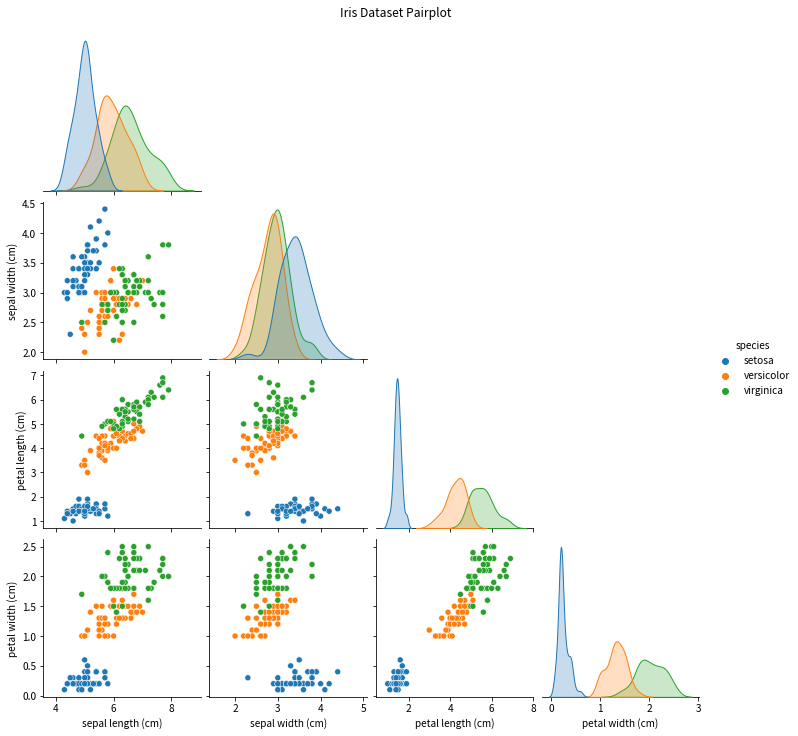

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris

# Irisデータセットのロード
iris = load_iris()

# データをDataFrameに変換
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# ペアプロットの作成
plt.figure(figsize=(12, 10))
sns.pairplot(df, hue='species', corner=True)
plt.suptitle('Iris Dataset Pairplot', y=1.02)
plt.show()


Irisデータセットのペアプロット．4つの特徴量sepal(がく片)の長さ・幅、petal(花弁)の長さ・幅をペアごとにプロットしており，3つの異なる色は3つの異なる種類のアイリス（setosa, versicolor, virginica）を示している．

In [9]:
# MLPClassifierのインスタンス化
clf = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)

# モデルの訓練
clf.fit(X_train, y_train)

# テストデータでの予測
y_pred = clf.predict(X_test)

# 正確さの計算
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


ニューラルネットワークのアーキテクチャは次のようになっている：

入力層：4つのノード（Irisデータセットの4つの特徴量に対応）

1つ目の隠れ層：50のノード

2つ目の隠れ層：50のノード

出力層：3つのノード（3つのクラスラベルに対応